<a href="https://colab.research.google.com/github/vidhi-sys/Machine-Learning-Journey/blob/main/GridCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [9]:
data=pd.read_csv('Ice_cream selling data.csv')
print(data.head())

   Temperature (°C)  Ice Cream Sales (units)
0         -4.662263                41.842986
1         -4.316559                34.661120
2         -4.213985                39.383001
3         -3.949661                37.539845
4         -3.578554                32.284531


In [11]:
x=data['Ice Cream Sales (units)']
y=data['Temperature (°C)']

In [16]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [22]:
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsRegressor

model = KNeighborsRegressor() # Use KNeighborsRegressor
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x.values.reshape(-1, 1), y)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best score: -55.731654499762655


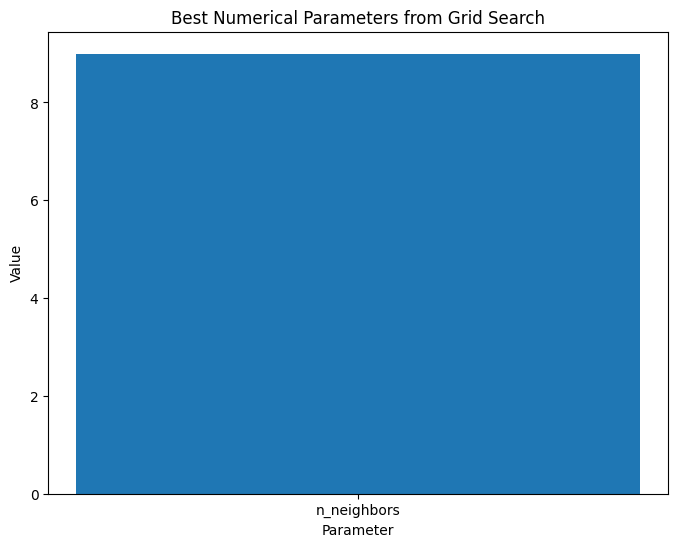

Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}


In [25]:
best_params = grid_search.best_params_
param_names = list(best_params.keys())
param_values = list(best_params.values())

# Filter out non-numerical parameters for the bar plot
numerical_params = {k: v for k, v in best_params.items() if isinstance(v, (int, float))}
numerical_param_names = list(numerical_params.keys())
numerical_param_values = list(numerical_params.values())

if numerical_param_values: # Only plot if there are numerical parameters
    plt.figure(figsize=(8, 6))
    plt.bar(numerical_param_names, numerical_param_values)
    plt.title('Best Numerical Parameters from Grid Search')
    plt.xlabel('Parameter')
    plt.ylabel('Value')
    plt.show()
else:
    print("No numerical parameters to plot.")

print("Best parameters:", best_params)